In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix



In [15]:
glass = pd.read_excel("glass.xlsx")

In [16]:
columns = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
glass = pd.read_csv(url, names=columns, index_col=False)
glass.drop('Id', axis=1, inplace=True)
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [36]:
glass1 = glass[["RI","Al","Ca", "Type"]]
glass1

,RI,Al,Ca,Type
0,1.52101,1.10,8.75,1
1,1.51761,1.36,7.83,1
2,1.51618,1.54,7.78,1
3,1.51766,1.29,8.22,1
4,1.51742,1.24,8.07,1
...,...,...,...,...
209,1.51623,2.88,9.18,7
210,1.51685,1.99,8.40,7
211,1.52065,2.02,8.44,7
212,1.51651,1.94,8.48,7


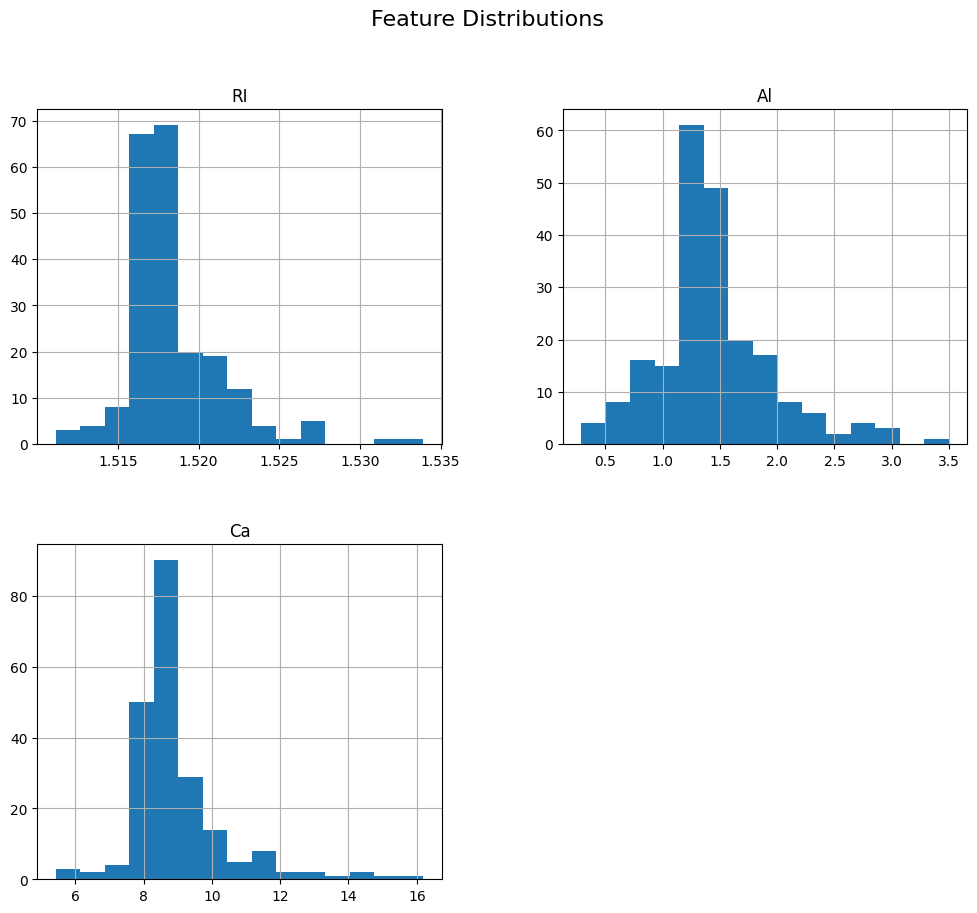

In [33]:
glass1.hist(figsize=(12,10), bins=15)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

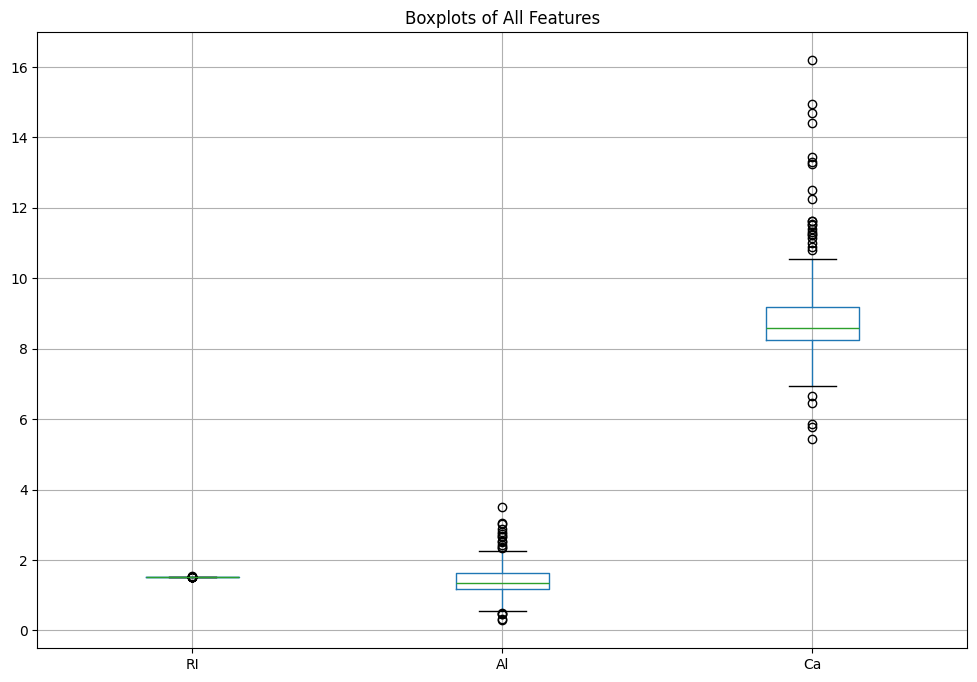

In [34]:
plt.figure(figsize=(12,8))
glass1.boxplot()
plt.title("Boxplots of All Features")
plt.show()

In [37]:
glass1.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
209,False
210,False
211,False
212,False


In [38]:
glass1.describe()

,RI,Al,Ca,Type
count,214.000000,214.000000,214.000000,214.000000
mean,1.518365,1.444907,8.956963,2.780374
std,0.003037,0.499270,1.423153,2.103739
min,1.511150,0.290000,5.430000,1.000000
25%,1.516522,1.190000,8.240000,1.000000
50%,1.517680,1.360000,8.600000,2.000000
75%,1.519157,1.630000,9.172500,3.000000
max,1.533930,3.500000,16.190000,7.000000


In [39]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

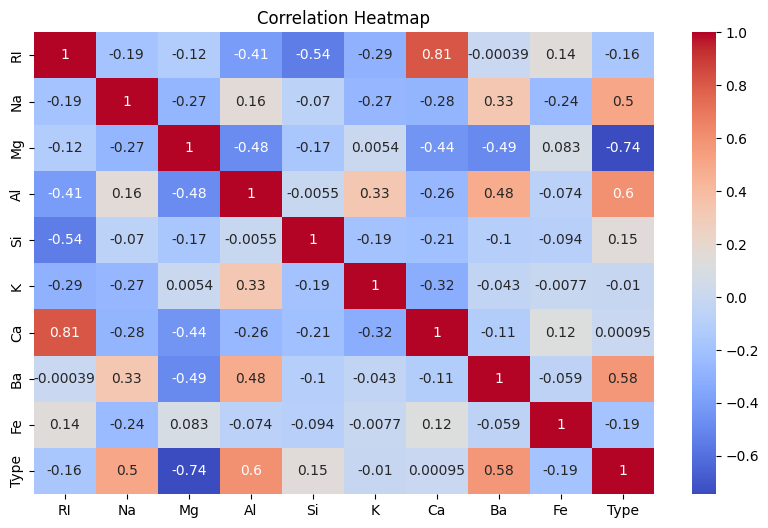

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(glass.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [41]:
glass.isnull().sum()


,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [42]:
X = glass.drop('Type', axis=1)
y = glass['Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [44]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Accuracy: 0.813953488372093
Precision: 0.8283499446290145
Recall: 0.813953488372093
F1-Score: 0.8147408325435591

Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.79      0.73      0.76        15
           3       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.81        43
   macro avg       0.87      0.85      0.84        43
weighted avg       0.83      0.81      0.81        43



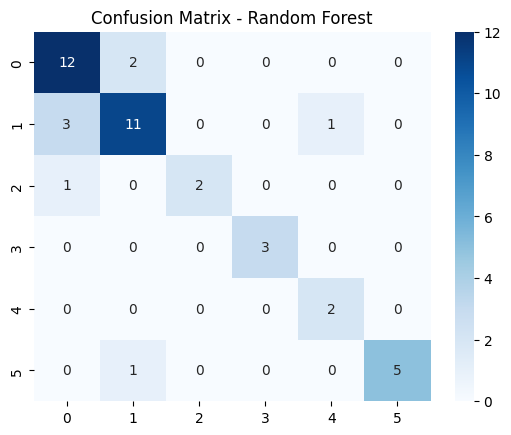

In [47]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()